In [ ]:
!pip install mplfinance
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.1 MB/s eta 0:00:00


In [ ]:
file_path = r'/content/yahoo_data.xlsx'
data = pd.read_excel(file_path, index_col='Date', parse_dates=True)
data


,Open,High,Low,Close*,Adj Close**,Volume
Date,,,,,,
2023-04-28,33797.43,34104.56,33728.40,34098.16,34098.16,354310000
2023-04-27,33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2023-04-26,33596.34,33645.83,33235.85,33301.87,33301.87,321170000
2023-04-25,33828.34,33875.49,33525.39,33530.83,33530.83,297880000
2023-04-24,33805.04,33891.15,33726.09,33875.40,33875.40,252020000
...,...,...,...,...,...,...
2018-05-07,24317.66,24479.45,24263.42,24357.32,24357.32,307670000
2018-05-04,23865.22,24333.35,23778.87,24262.51,24262.51,329480000
2018-05-03,23836.23,23996.15,23531.31,23930.15,23930.15,389240000


In [ ]:
data.rename(columns={'Close*': 'Close', 'Adj Close**': 'Adj Close'}, inplace=True)
data.sort_index(inplace=True)
data.ffill(inplace=True)

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-01,24117.29,24117.29,23808.19,24099.05,24099.05,380070000
2018-05-02,24097.63,24185.52,23886.30,23924.98,23924.98,385350000
2018-05-03,23836.23,23996.15,23531.31,23930.15,23930.15,389240000
2018-05-04,23865.22,24333.35,23778.87,24262.51,24262.51,329480000
2018-05-07,24317.66,24479.45,24263.42,24357.32,24357.32,307670000
...,...,...,...,...,...,...
2023-04-24,33805.04,33891.15,33726.09,33875.40,33875.40,252020000
2023-04-25,33828.34,33875.49,33525.39,33530.83,33530.83,297880000
2023-04-26,33596.34,33645.83,33235.85,33301.87,33301.87,321170000


In [ ]:
# Rename the suspicious columns to the expected names
reduced_data.rename(columns={'Close*': 'Close', 'Adj Close**': 'Adj Close'}, inplace=True)

# Now try plotting again
mpf.plot(reduced_data, type='candle', style='charles', title='Candlestick Chart')

In [ ]:
# Split data into training and testing sets
train_data, test_data = data['Adj Close**'][:int(len(data)*0.8)], data['Adj Close**'][int(len(data)*0.8):]

In [ ]:
# Train ARIMA model
model = ARIMA(train_data, order=(5, 1, 0))
model_fit = model.fit()


In [ ]:
# Forecast and evaluate
forecast = model_fit.forecast(steps=len(test_data))
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

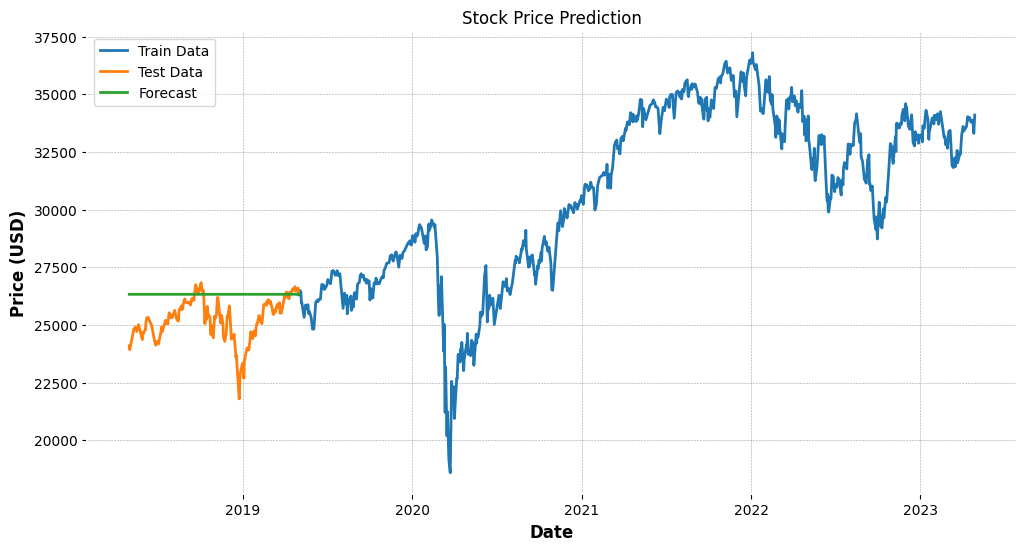

In [ ]:
# Plot actual vs forecasted prices
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, forecast, label='Forecast')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


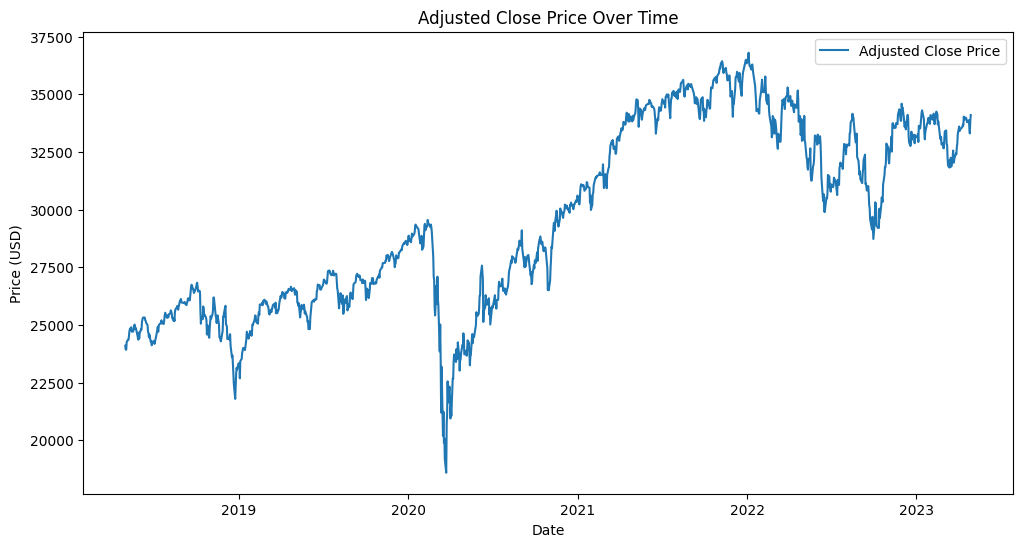

In [ ]:
# Plot Adjusted Close Price
if 'Adj Close' in data.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(data['Adj Close'], label='Adjusted Close Price')
    plt.title('Adjusted Close Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()
else:
    print("Column 'Adj Close' not found in the data.")